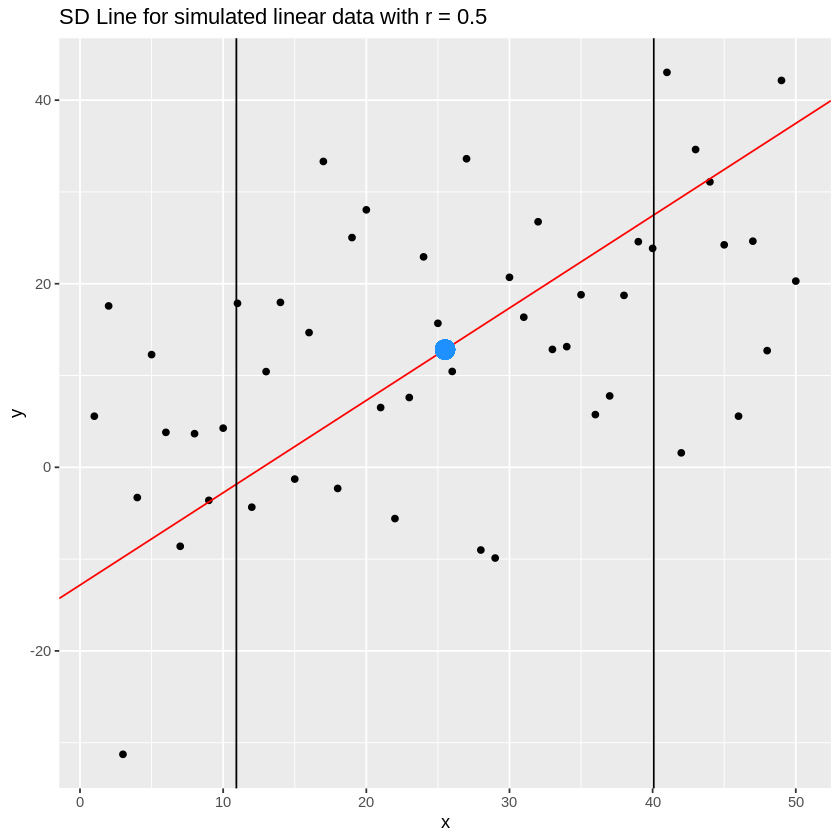

In [3]:
library(ggplot2)
library(dplyr)
library(magrittr)
gen.y <- function(x, rho) {
  y <- rnorm(length(x)) 
  x.perp <- residuals(lm(y ~ x))
  rho * sd(x.perp) * x + x.perp * sd(x) * sqrt(1 - rho^2)
}
x <- 1:50
y <- gen.y(x, 0.5)

dat <- data.frame(x=x, y=y)

p.sd <- ggplot(dat %>% mutate(slope.sd=sd(y)/sd(x), 
                        icept.sd= mean(y)- (sd(y)/sd(x))*mean(x)),
                        aes(x, y)) + 
        geom_point() + 
        geom_abline(aes(intercept=icept.sd, slope=slope.sd), col="red")+
        geom_vline(xintercept = mean(x)+sd(x))+
        geom_vline(xintercept = mean(x)-sd(x))+
        geom_point(aes(x=mean(x), y=mean(y)), colour="dodgerblue", size=5)+
        ggtitle("SD Line for simulated linear data with r = 0.5")
        
p.sd

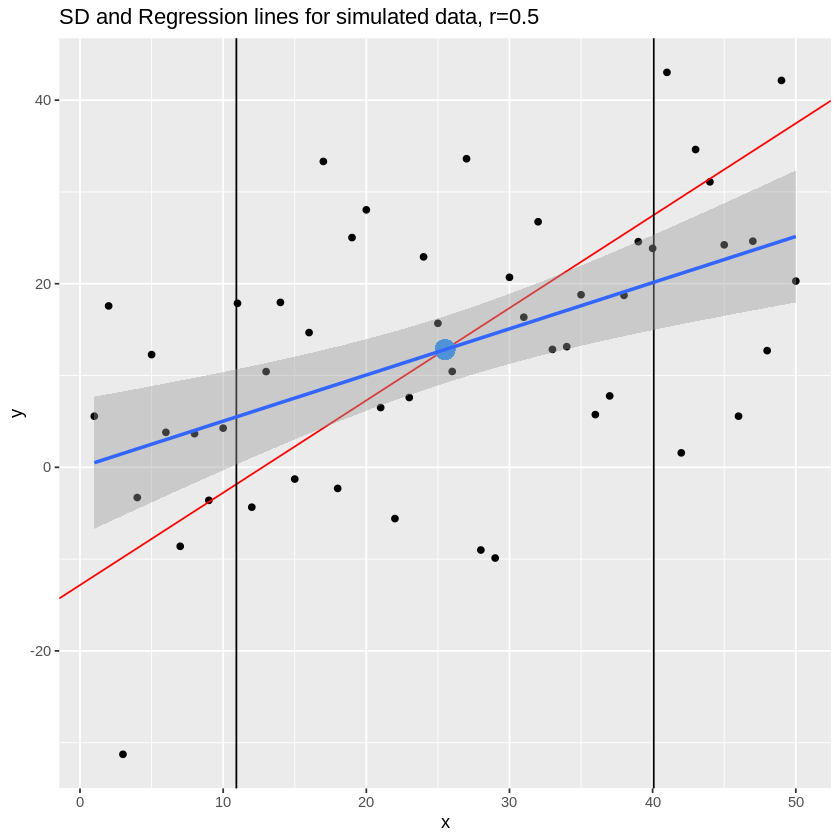

In [4]:
p.r <- p.sd + geom_smooth(method='lm',formula=y~x) + ggtitle("SD and Regression lines for simulated data, r=0.5")
p.r

In [5]:
x <- 0:50
r <- seq(0, 1, by=0.05)

y.vals <- unlist(purrr::map(r, ~gen.y(x, .)))
x.vals <- rep(x, length(r))
r.vals <- rep(r, each=length(x))


data <- data.frame(x.vals=x.vals, y.vals=y.vals, r.vals=r.vals)
head(data)

,x.vals,y.vals,r.vals
,<int>,<dbl>,<dbl>
1,0,-5.322640,0
2,1,12.381692,0
3,2,-9.506285,0
4,3,12.095871,0
5,4,-14.966398,0
6,5,-22.741564,0


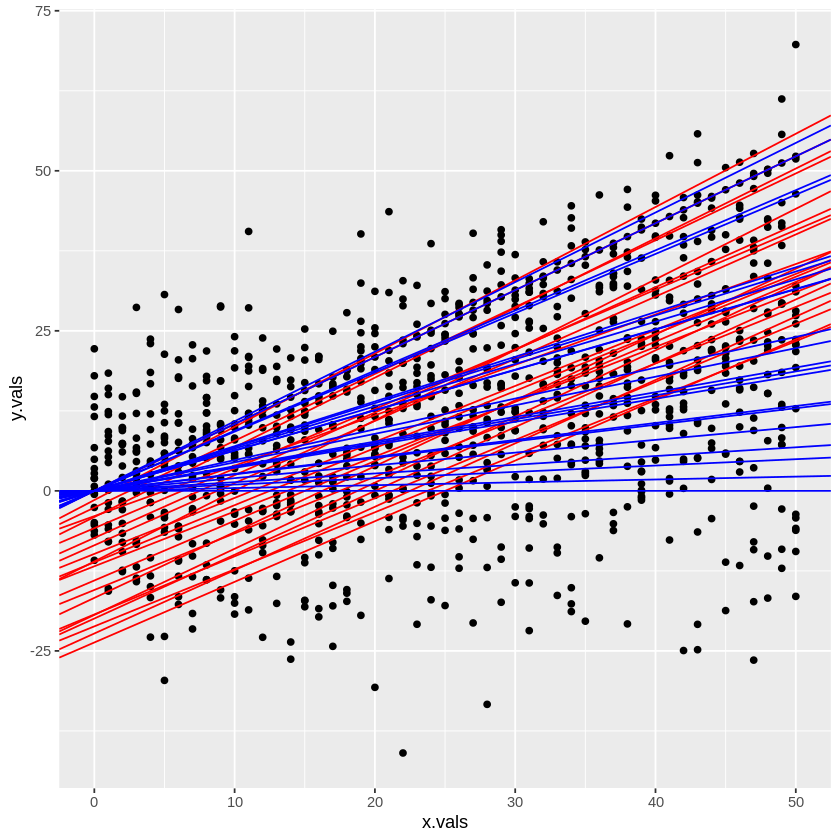

In [6]:
p.set <- ggplot( data %>% group_by(r.vals) %>% mutate(slope.sd=sd(y.vals)/sd(x.vals), 
                                     icept.sd= mean(y.vals)- (sd(y.vals)/sd(x.vals))*mean(x.vals),
                                     slope.r=r.vals*sd(y.vals)/sd(x.vals),
                                     icept.r= mean(y.vals)- (r.vals*sd(y.vals)/sd(x.vals))*mean(x.vals))
             , aes(x.vals, y.vals)) + 
  geom_point() + 
  geom_abline(aes(intercept=icept.sd, slope=slope.sd), col="red") +
  geom_abline(aes(intercept=icept.r, slope=slope.r), col="blue")


p.set